In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import copy

In [5]:
df1 = pd.read_csv('ds_salaries.csv')
df1

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [6]:
df2= df1.drop("Unnamed: 0",axis=1)

In [7]:
df1.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


(607, 12)

In [9]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.0,303.000000,1.753701e+02,0.0,151.5,303.0,454.5,606.0
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [10]:
df1.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

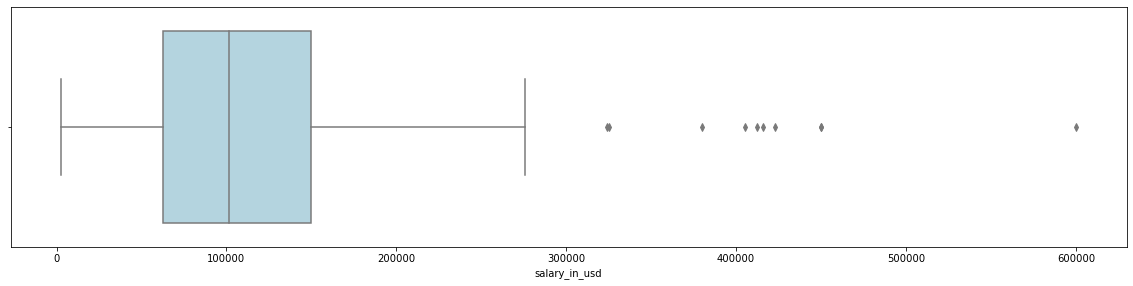

In [11]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df1.salary_in_usd, color='lightblue')

# plt.subplot(3,1,2)
# sns.boxplot(x= df1.salary_in_usd, color='lightblue')

# plt.subplot(3,1,3)
# sns.boxplot(x= df1.company_location, color='lightblue')

plt.show()

In [26]:
#from this box plot we see that there are some outliers in the salary from the actual range so we will try to see the factors affecting the salary 

<AxesSubplot:ylabel='company_size'>

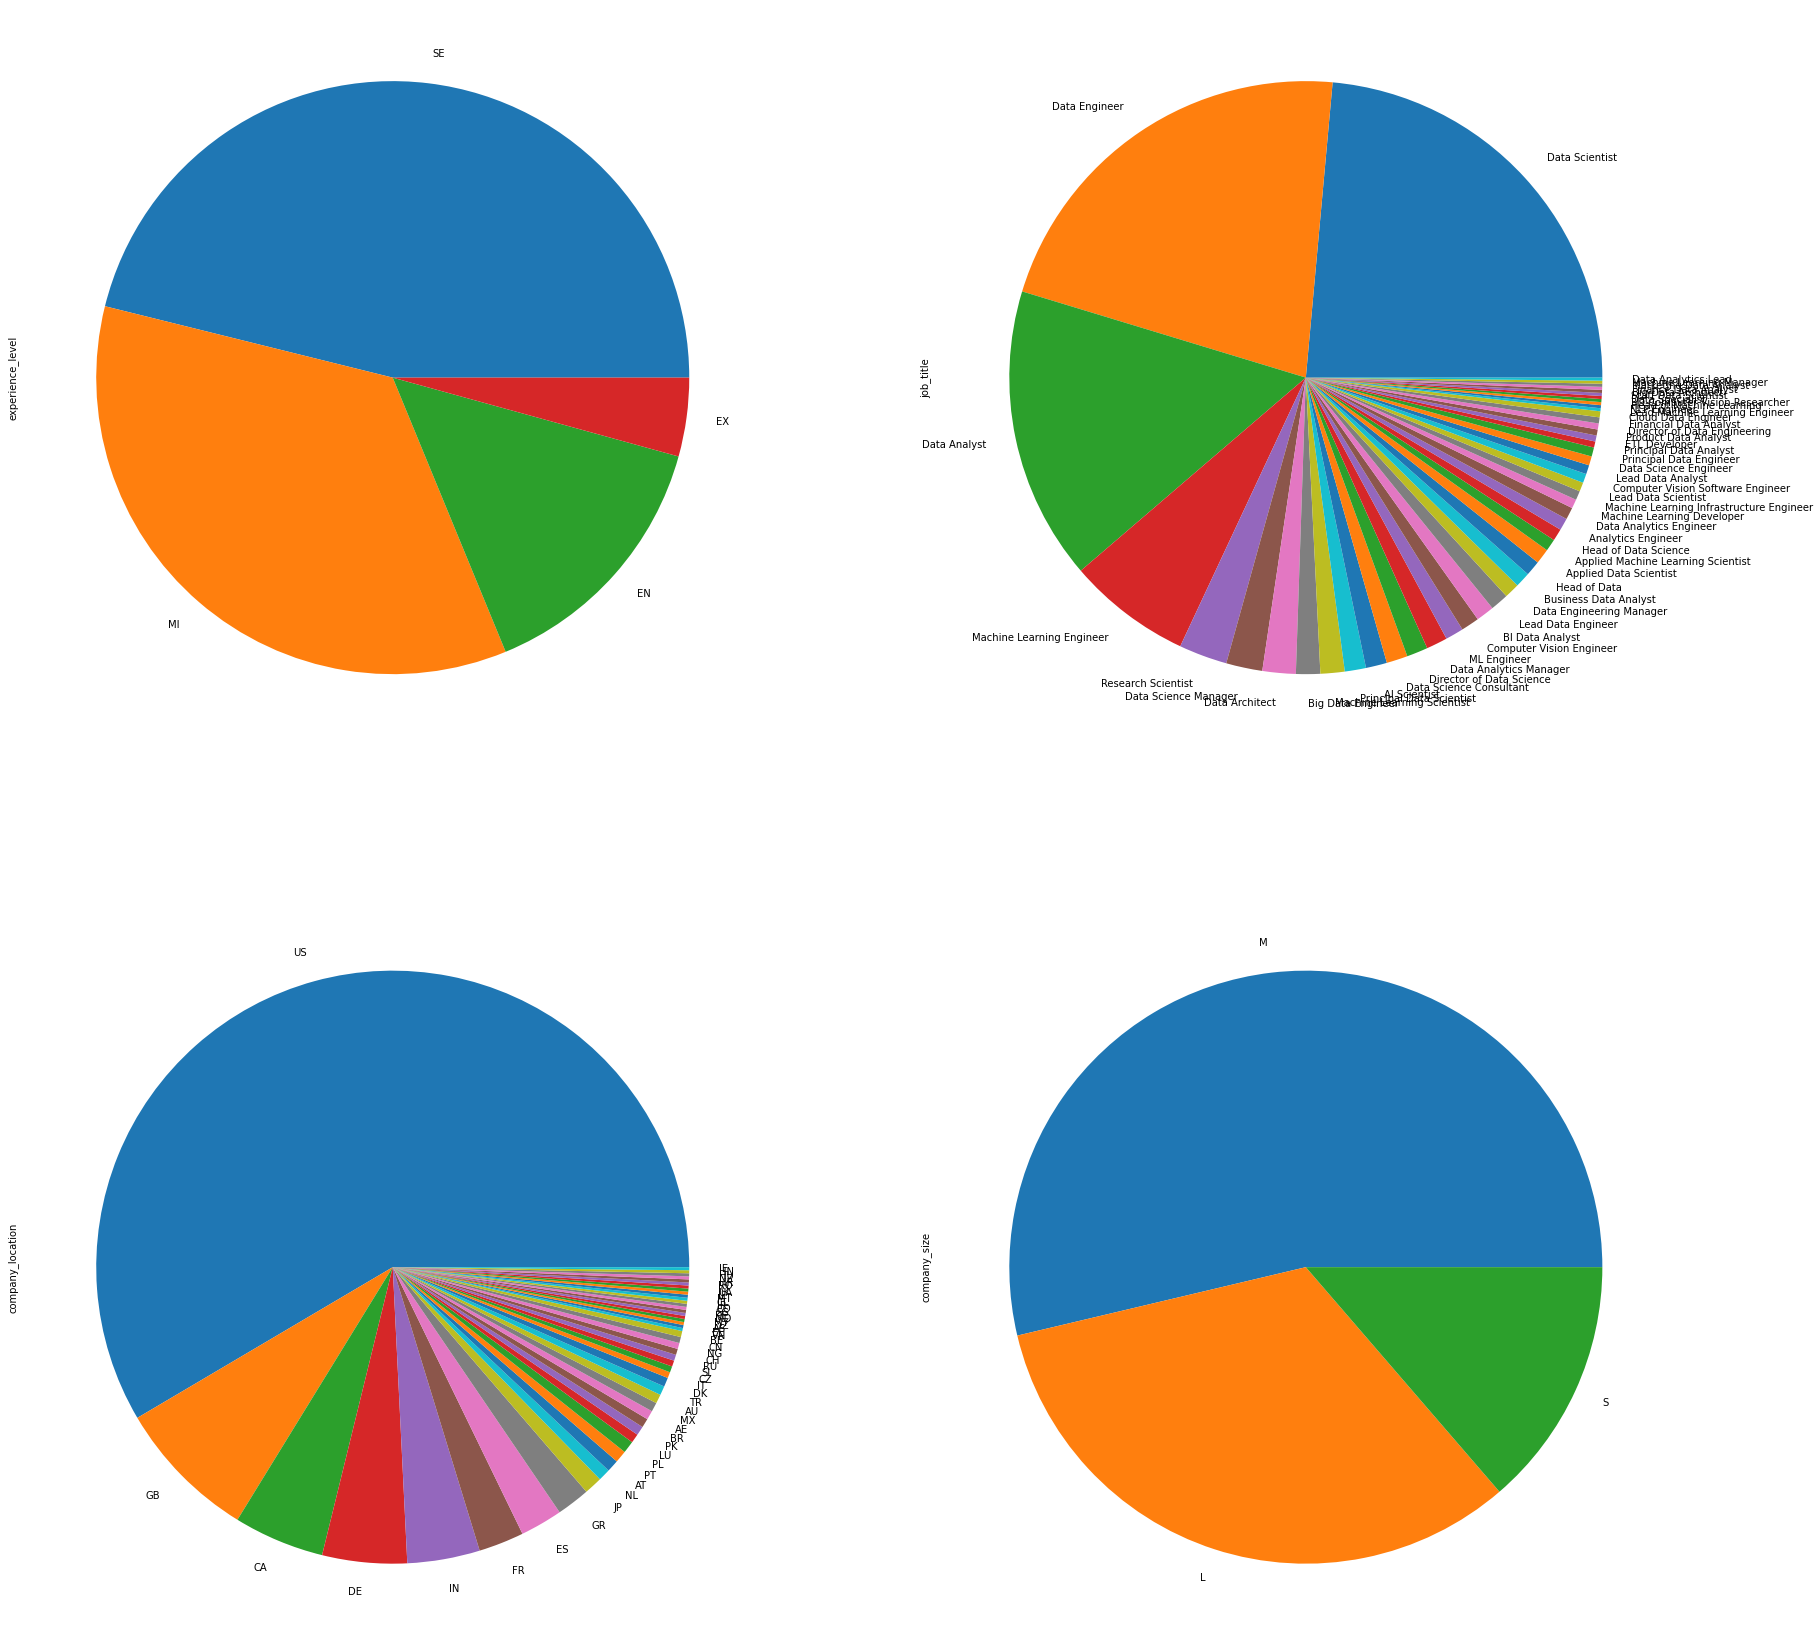

In [12]:
plt.figure(figsize= (30,30))

plt.subplot(2,2,1)
df1['experience_level'].value_counts().plot(kind = 'pie')

plt.subplot(2,2,2)
df1['job_title'].value_counts().plot(kind = 'pie')

plt.subplot(2,2,3)
df1['company_location'].value_counts().plot(kind = 'pie')

plt.subplot(2,2,4)
df1['company_size'].value_counts().plot(kind = 'pie')

#figure_size
#group_by

In [27]:
#from this plot we get an over view on the companies size, the most comomn jobs, the the location of the companies and the expireince level percentage 

<AxesSubplot:ylabel='remote_ratio'>

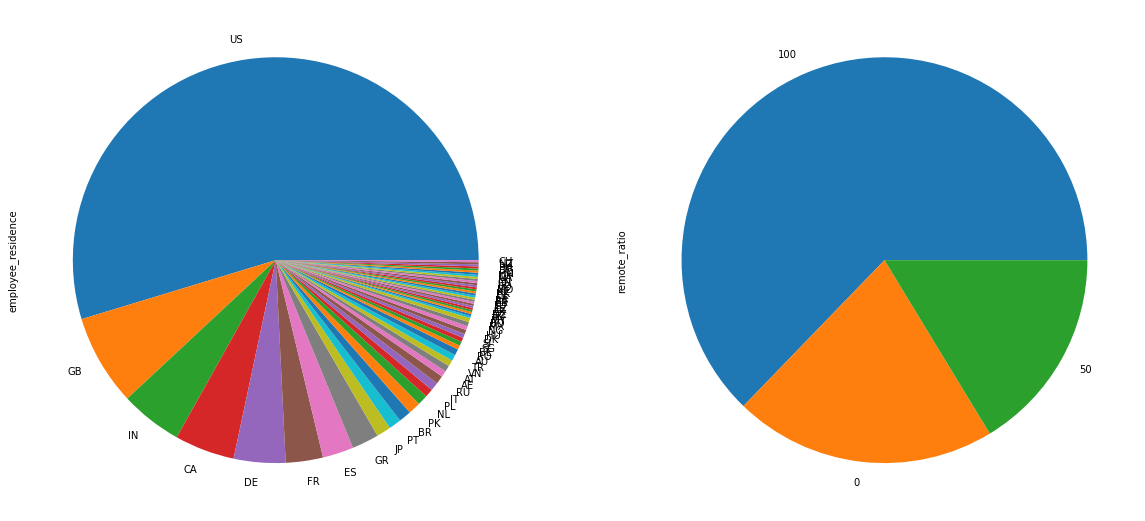

In [13]:
# plt.subplot(2,1,1)
plt.figure(figsize= (20,15))

plt.subplot(1,2,1)
df1['employee_residence'].value_counts().plot(kind = 'pie')

plt.subplot(1,2,2)
df1['remote_ratio'].value_counts().plot(kind = 'pie')

In [ ]:
#Here it make sence that mots of the employee are from the USA since we know that most locations are in the USA, however, the remote ratio and hybrid ration are the majority and only small portion work on site 



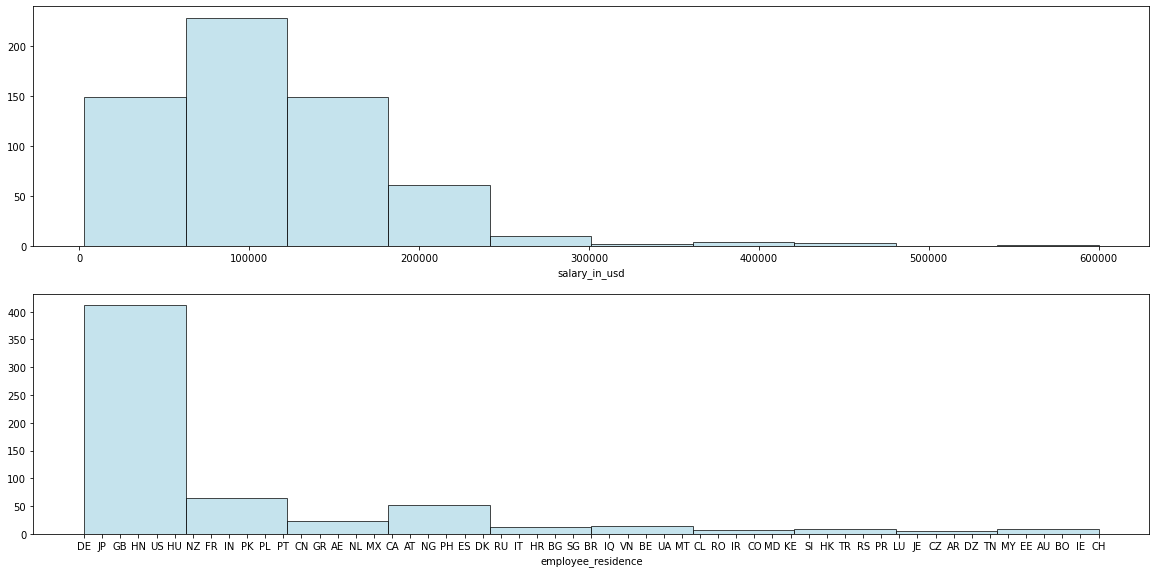

In [29]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
plt.hist(df1.salary_in_usd, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('salary_in_usd')

plt.subplot(3,1,2)
plt.hist(df1.employee_residence, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('employee_residence')

# plt.subplot(3,1,3)
# plt.hist(df1.remote_ratio, color='lightblue', edgecolor = 'black', alpha = 0.7)
# plt.xlabel('remote_ratio')

plt.show()

In [ ]:
# the only new information that I can find here is that most salaries are around $100,000

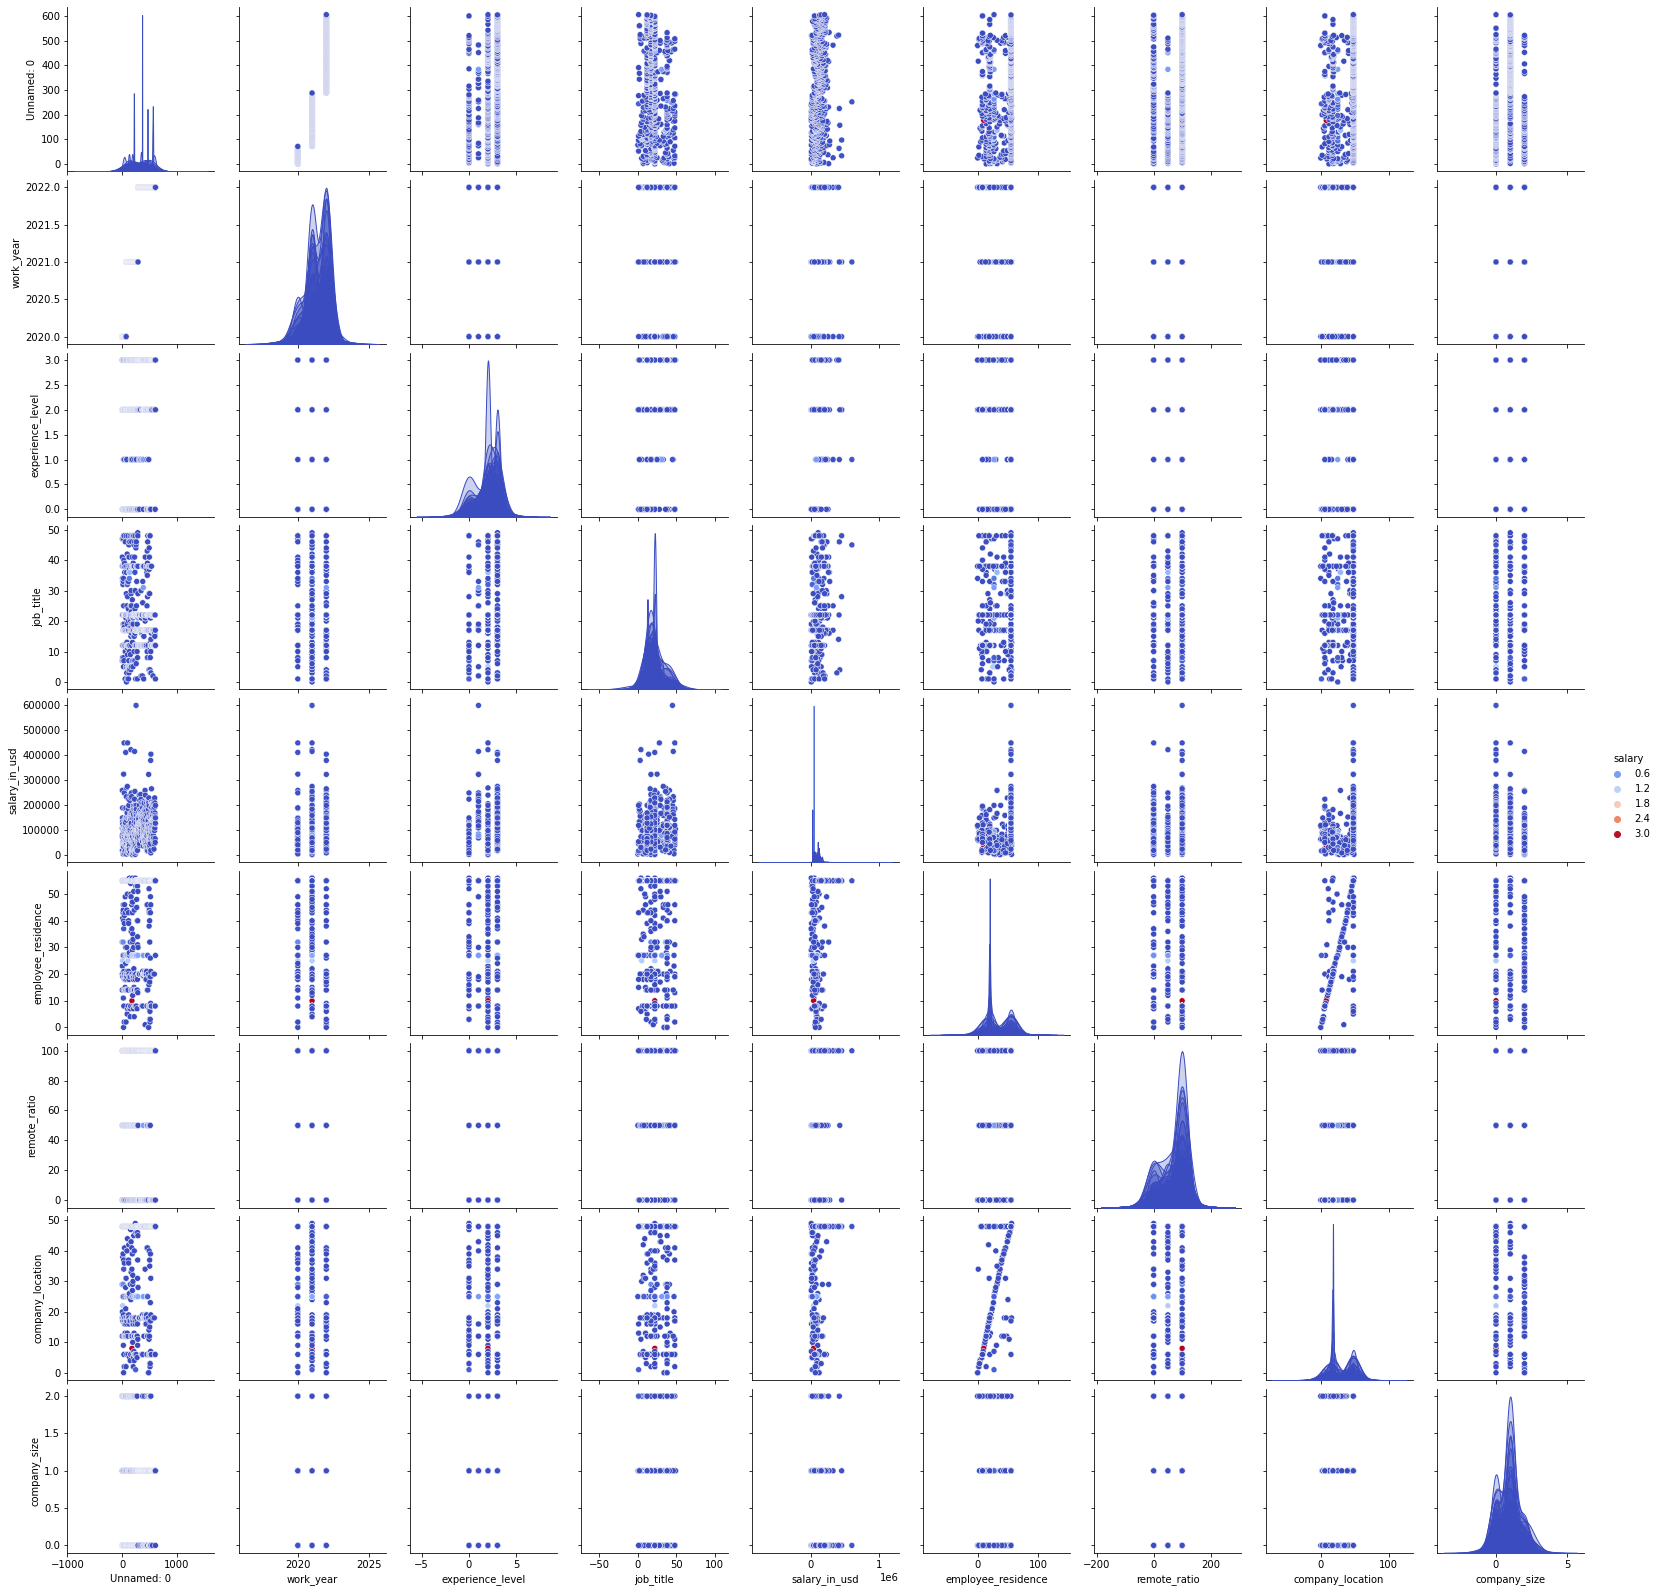

In [15]:
df_encoded = copy.deepcopy(df1)
df_encoded.loc[:,['job_title', 'employee_residence', 'experience_level','company_location','company_size']] = df_encoded.loc[:,['job_title', 'employee_residence', 'experience_level','company_location','company_size']].apply(LabelEncoder().fit_transform) 
sns.pairplot(df_encoded,hue='salary',palette='coolwarm')  #pairplot
plt.show()

In [ ]:
#I can't find anything that can be useful in these plots 

D:\Programming\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


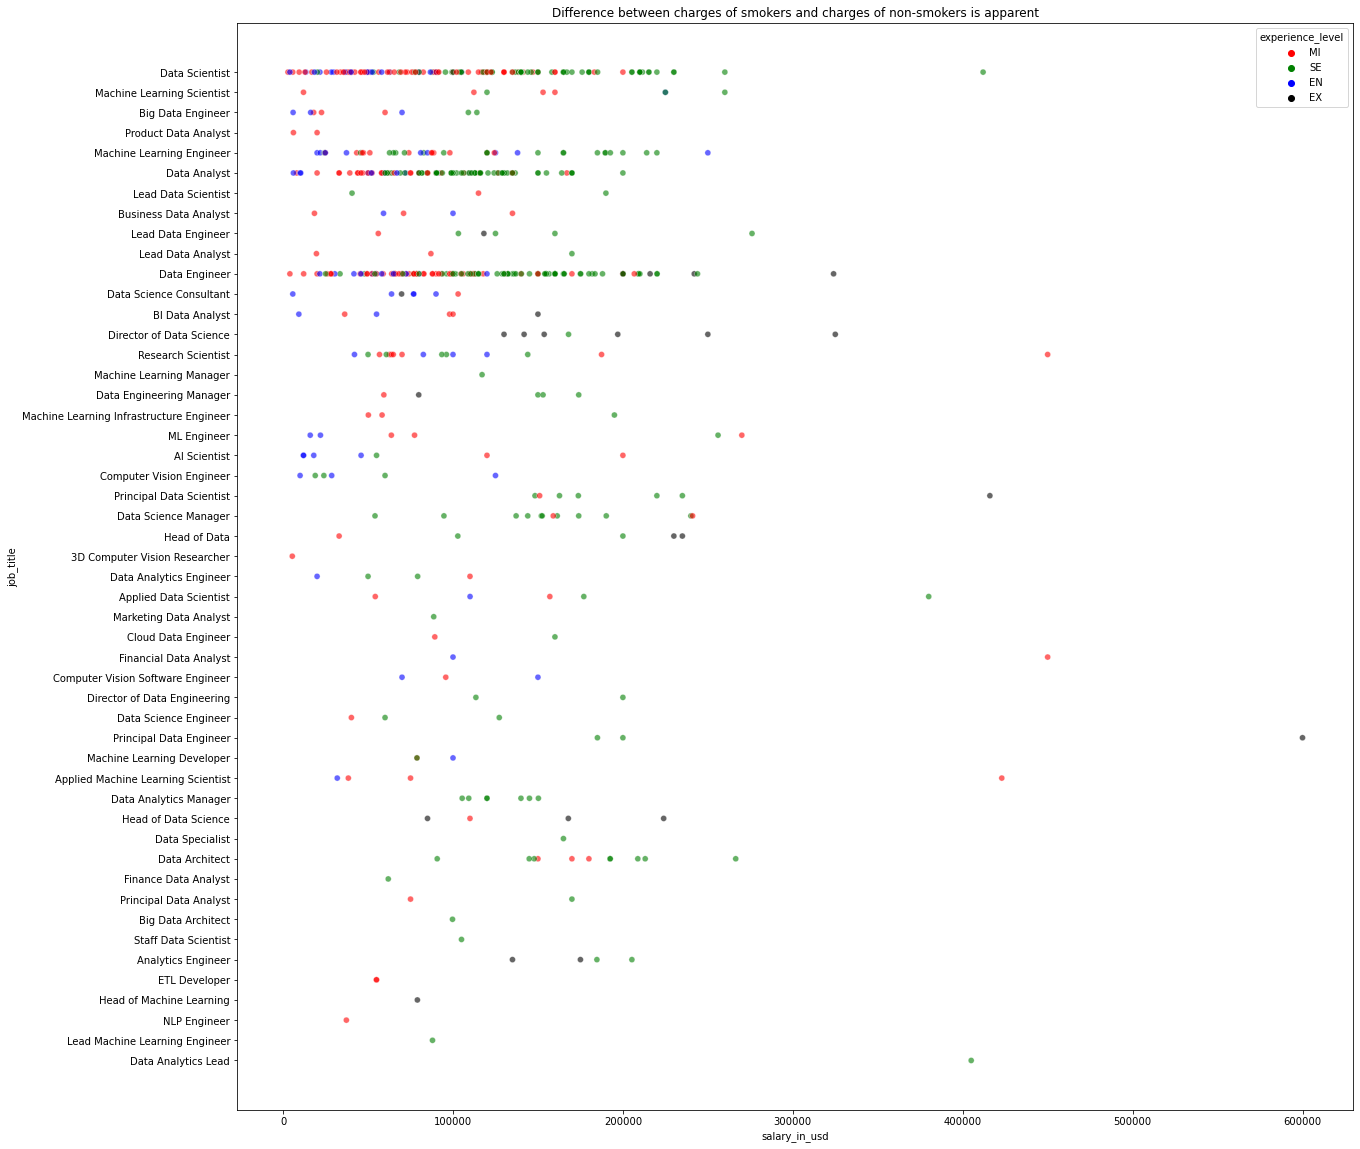

In [16]:
plt.figure(figsize=(20,20))
sns.scatterplot(df1.salary_in_usd, df1.job_title,hue=df1.experience_level,palette= ['red','green','blue','black'] ,alpha=0.6)
plt.title("Difference between charges of smokers and charges of non-smokers is apparent")
plt.show()

In [34]:
#Here we find that most jobs are in Data analyist, data scientist, and data engineers the salary inrease as the expirience incresae except in some cases and this most probably because the salary scale in different countries is not the same 

<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

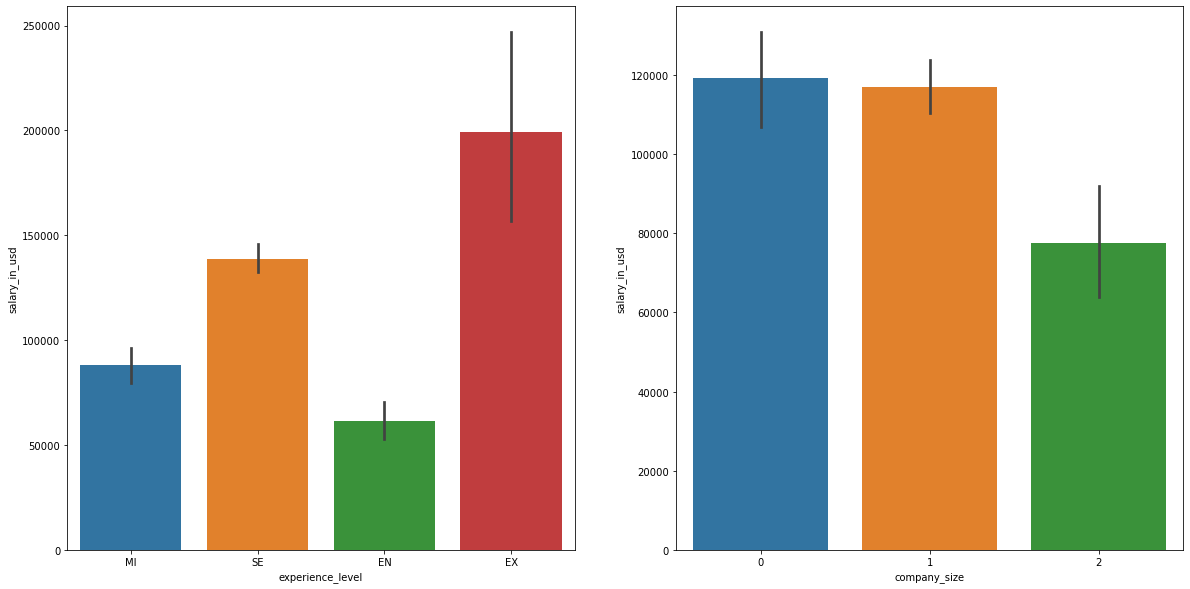

In [18]:
plt.figure(figsize= (20,10))

plt.subplot(1,2,1)
sns.barplot(x='experience_level',y='salary_in_usd',data=df1)

plt.subplot(1,2,2)
sns.barplot(x='company_size',y='salary_in_usd',data=df_encoded)

#error_bar

In [36]:
#Here it's obvious that the level of experience has a big effect on salaries while in company size there is no big difference between large and medium companies



#the error bars denotes that the salary will be in a close range in the EN,MI,and,SE but there is a noticable range in executive position as it shows the mean is around $200k and the min is above $150k and max below $250K which is around $100k diviation 


#the same thing applies to the company size that the range of the difference in salaries decrease as the company size increase this may indicate more professionalism or they are keeping it more fair to the employees 

<AxesSubplot:xlabel='salary_in_usd', ylabel='company_location'>

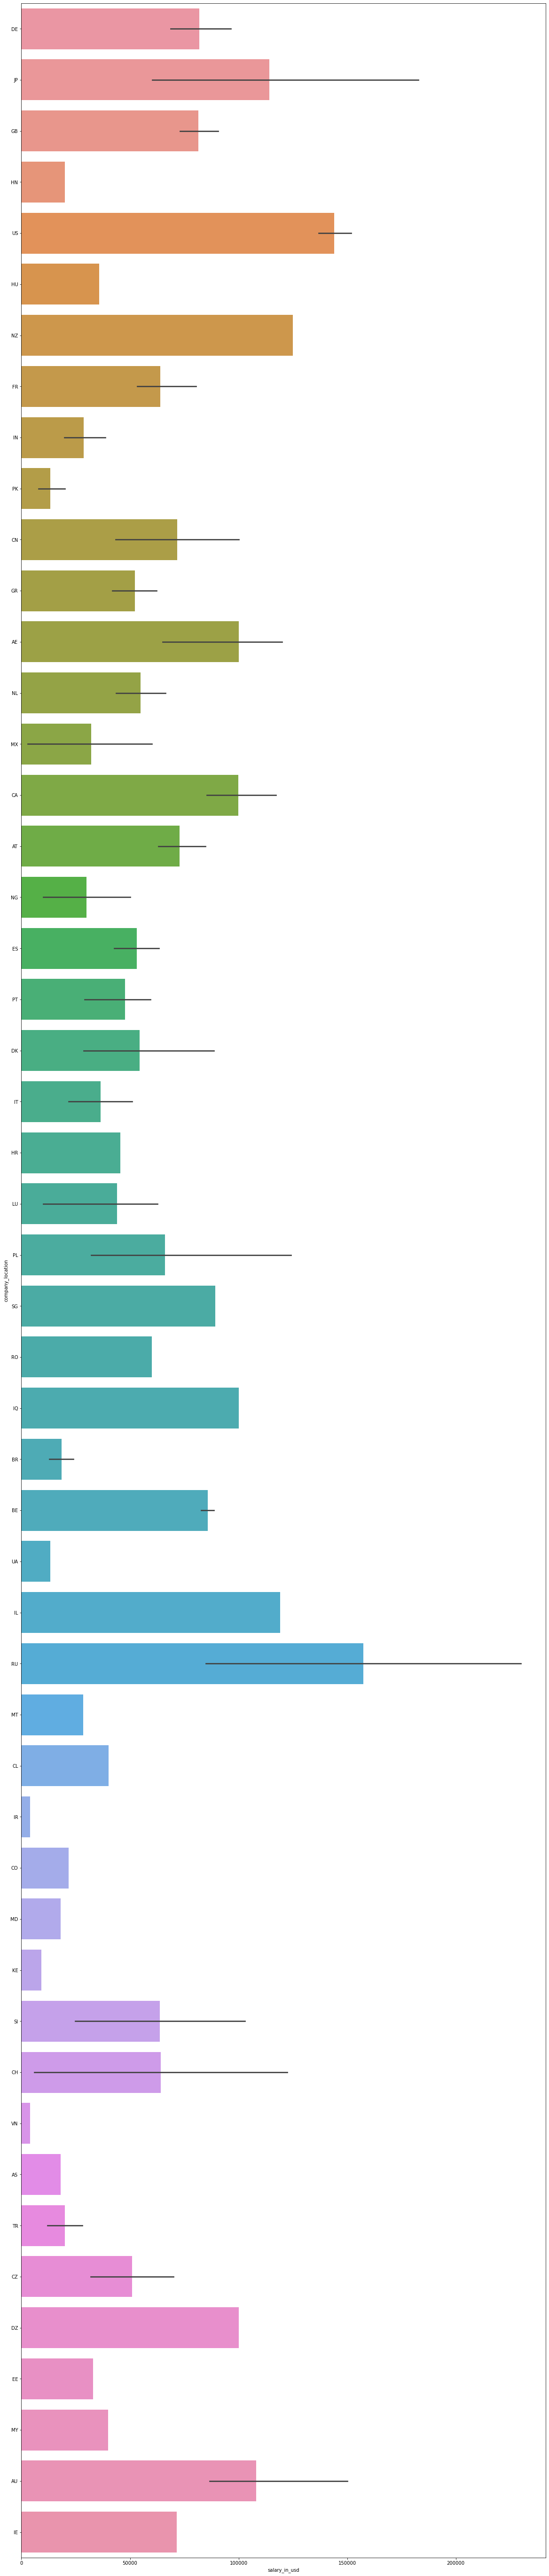

In [20]:
plt.figure(figsize= (20,100))

plt.subplot(1,1,1)
sns.barplot(x='salary_in_usd',y='company_location',data=df1)

In [21]:
#here we see that the company location can affect the salaries of the employees the longer the error bar represents the number of possible jobs with different salaries in this country 

#I guess locations with no error bars may represent that there is only ine employee for this job or all the employees have the same salary 

<AxesSubplot:xlabel='salary_in_usd', ylabel='job_title'>

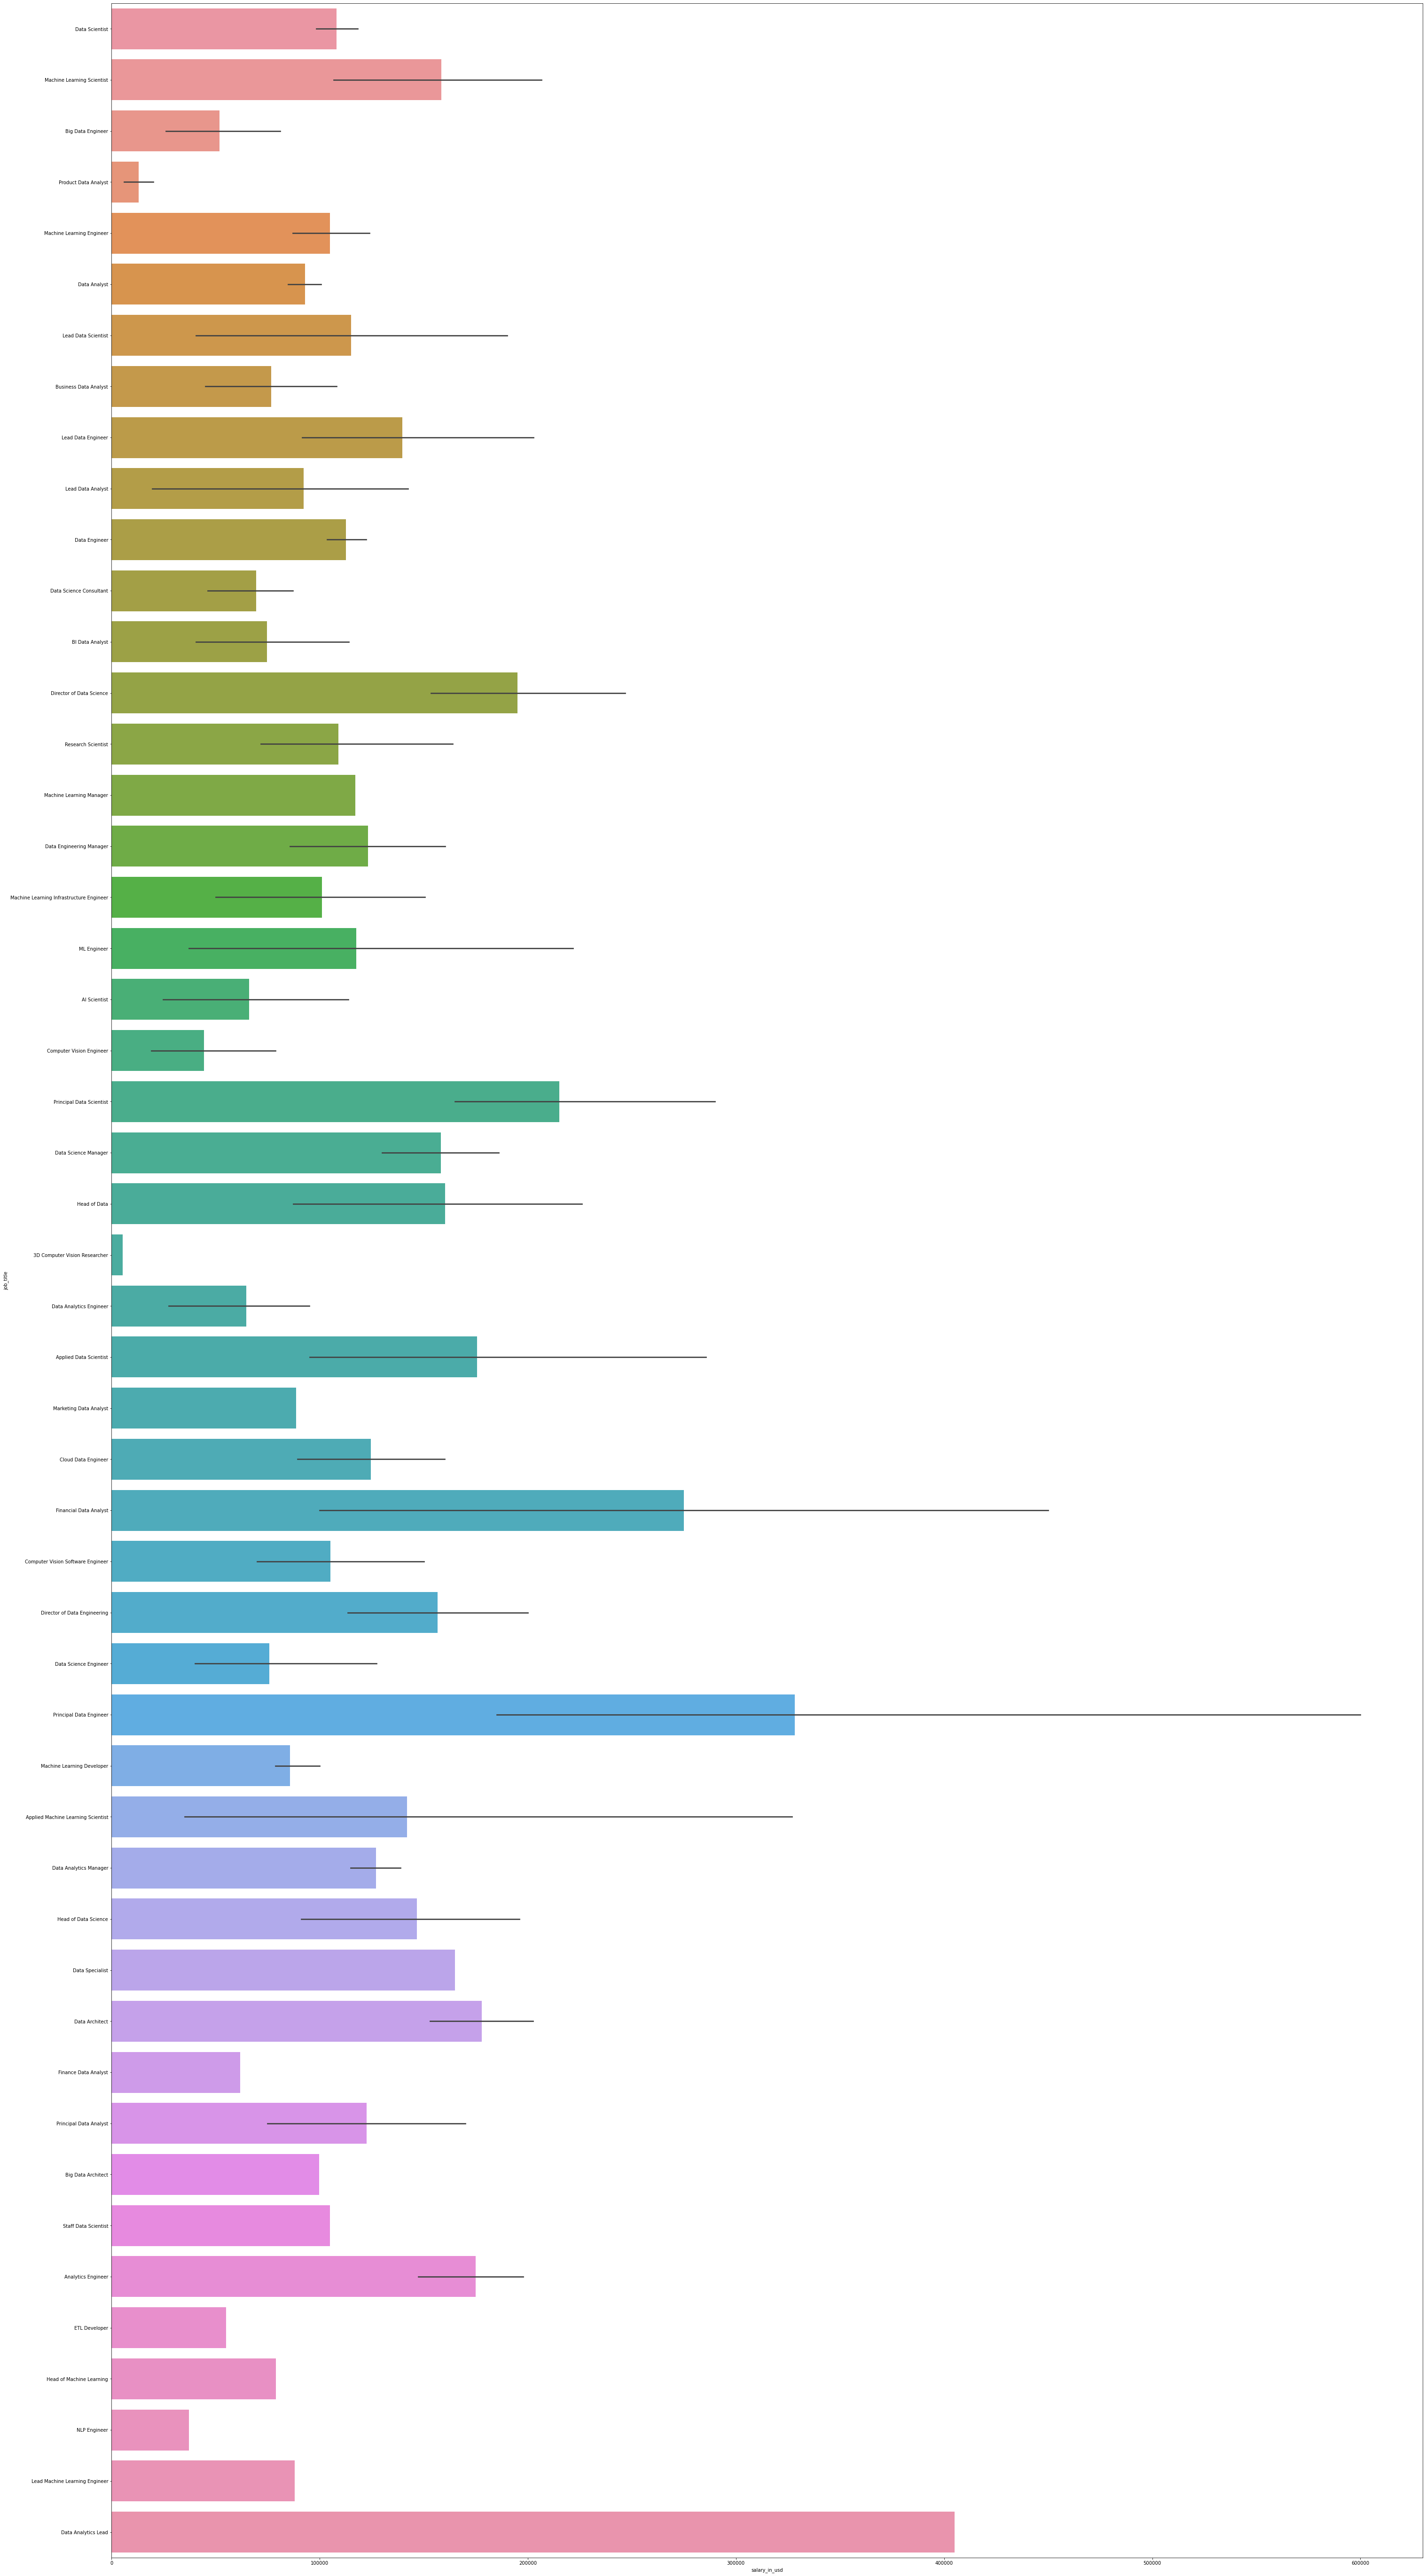

In [22]:
plt.figure(figsize= (50,100))
sns.barplot(x='salary_in_usd',y='job_title',data=df1)

In [37]:
#from this graph we can tell that some jobs have a huge impact on salary scale relative to another jobs as data analytics lead has the highst paying salary compared to 3D computer vision researcher

# at the same time jobs with high error bar represents that the salary my be different depending on the location of the employee for a specific job

<AxesSubplot:xlabel='salary_in_usd', ylabel='employee_residence'>

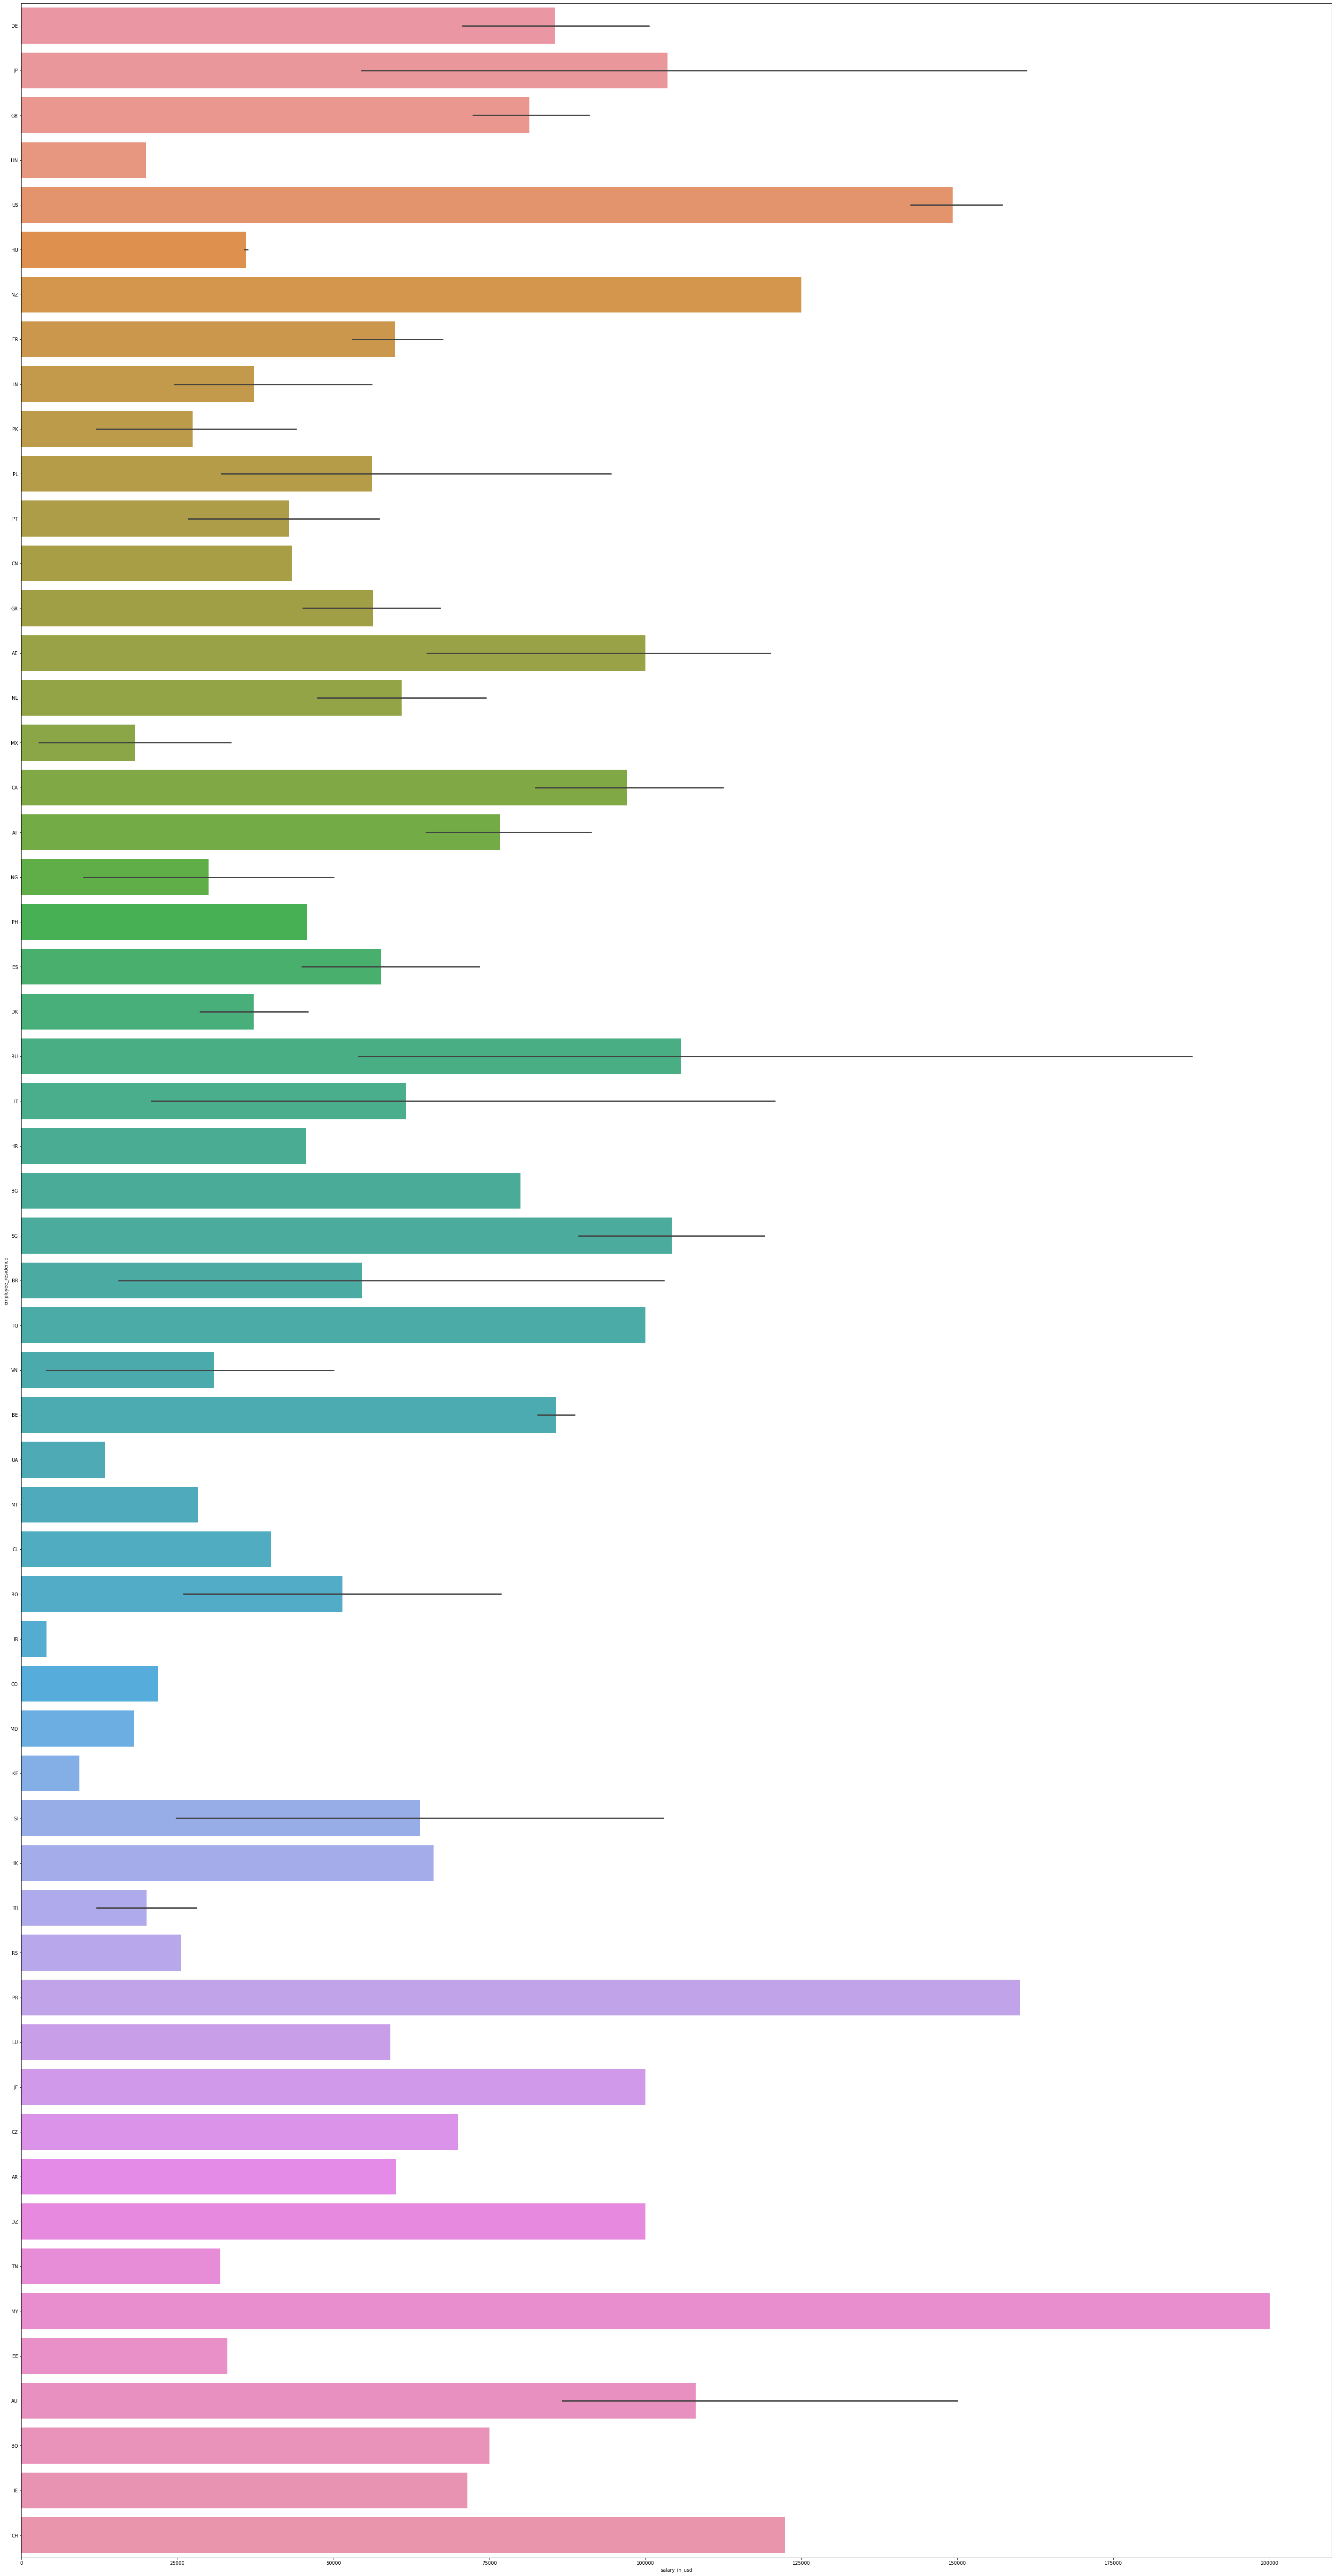

In [24]:
plt.figure(figsize= (50,100))
sns.barplot(x='salary_in_usd',y='employee_residence',data=df1)

In [38]:
#this shows how the residince in specific locations can help in getting paid more 


#While there are about three locations with high error bar that can indicate the diversity in job title or expirience level

In [39]:
# At the end I hope I was able to get the most useful informations in this dataset and it is ready for next step of machine learning

# Please advise if I can do more analysis or how to get the best out of it